In [1]:
import sys
sys.path.append('/mnt/home/mbedell/.local/lib/python3.7/site-packages')

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
import glob
from tqdm import tqdm
#from lightkurve import TessTargetPixelFile

In [3]:
data_dir = '/mnt/ceph/users/mbedell/tess/'
fns = glob.glob(data_dir+'tess*_tp.fits')
N = len(fns)

In [4]:
N

645

In [5]:
hdul = fits.open(fns[0])
time = np.copy(hdul[1].data['TIME']) # assumes all TPFs have the same cadences
M = len(time)

In [6]:
cols = np.empty(N)
rows = np.empty(N)
ccds = np.empty(N)
cameras = np.empty(N)
bkgs = np.empty((N,M))
bad = [] # store indices that may need deleting
for i,fn in tqdm(enumerate(fns), total=N):
    try:
        hdul = fits.open(fn)
        cols[i] = np.copy(hdul[1].header['1CRV5P'])
        rows[i] = np.copy(hdul[1].header['2CRV5P'])
        ccds[i] = np.copy(hdul[0].header['CCD'])
        cameras[i] = np.copy(hdul[0].header['CAMERA'])
        bkgs[i,:] = np.copy(hdul[1].data['FLUX_BKG'][:,0,0]) # assumes all pixels get the same bkg
    except:
        print('something went wrong with file {0}'.format(fn))
        bad.append(i)

100%|██████████| 645/645 [09:14<00:00,  1.09it/s]


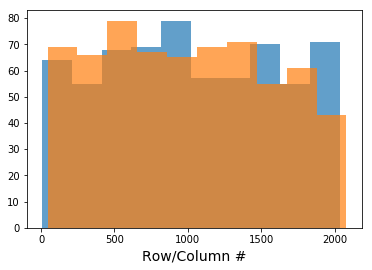

In [7]:
plt.hist(rows, alpha=0.7)
plt.hist(cols, alpha=0.7)
plt.xlabel('Row/Column #', fontsize=14);

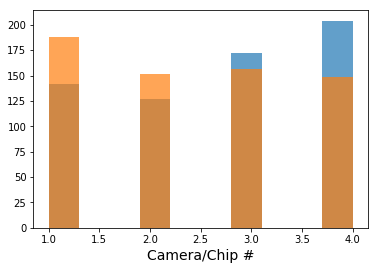

In [10]:
plt.hist(cameras, alpha=0.7)
plt.hist(ccds, alpha=0.7)
plt.xlabel('Camera/Chip #', fontsize=14);

/mnt/home/mbedell/anaconda3/envs/default/lib/python3.7/site-packages/numpy/lib/function_base.py:3405: RuntimeWarning: Invalid value encountered in median for 859 results
  r = func(a, **kwargs)


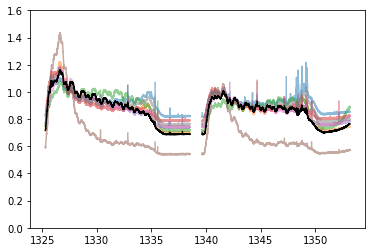

In [8]:
for i in np.linspace(0,N-1,8):
    plt.plot(time, bkgs[int(i)]/np.nanpercentile(bkgs[int(i)], 90), alpha=0.5)
bkg = np.median(bkgs, axis=0)
plt.plot(time, bkg/np.nanpercentile(bkg, 90), c='k')
plt.ylim([0,1.6]);

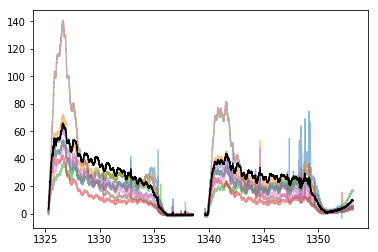

In [16]:
for i in np.linspace(0,N-1,8):
    plt.plot(time, bkgs[int(i)] - np.nanpercentile(bkgs[int(i)], 10), alpha=0.5)
bkg = np.median(bkgs, axis=0)
plt.plot(time, bkg - np.nanpercentile(bkg, 10), c='k')
#plt.ylim([0,1.6]);

In [17]:
f = open('../data/sector1_sc_medians.csv','w')
f.write('start_time,median_flux\n')
for t,m in zip(time, bkg):
    f.write('{0:.8f}, {1:.8f}\n'.format(t,m))
f.close()

In [23]:
ffi = np.genfromtxt('../data/sector1_2_2_medians.csv', delimiter=',', names=True, unpack=True)

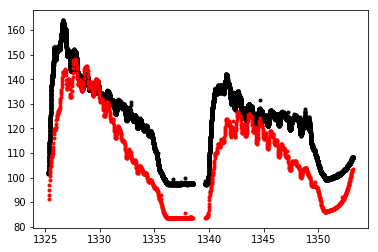

In [25]:
plt.plot(time, bkg, 'k.')
plt.plot(ffi['start_time'], ffi['median_flux'], 'r.')